<a href="https://colab.research.google.com/github/vsvale/IGTI-Bootcamp-Desenvolvedor-Python/blob/main/IGTI_Mod_6_Flask_diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
!git clone 'https://github.com/vsvale/Flask_diabetes.git'

Cloning into 'Flask_diabetes'...
remote: Enumerating objects: 26, done.
remote: Counting objects: 100% (26/26), done.
remote: Compressing objects: 100% (25/25), done.
remote: Total 26 (delta 6), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (26/26), done.


In [ ]:
df = pd.read_csv('/content/Flask_diabetes/pima-indians-diabetes.csv',header=None)
df.head()

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


0. Número de vezes em que ficou grávida.
1. Concentração de glicose.
2. Pressão diastólica (mm Hg).
3. Espessura da dobra cutânea do tríceps (mm).
4. Insulina (mu U/ml).
5. Índice de massa corporal (peso em kg/(altura em m)^2).
6. Histórico familiar de diabetes.
7. Idade (anos).
8. Classificação (0 ou 1 - 0 não diabético / 1 diabético ).

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       768 non-null    int64  
 1   1       768 non-null    int64  
 2   2       768 non-null    int64  
 3   3       768 non-null    int64  
 4   4       768 non-null    int64  
 5   5       768 non-null    float64
 6   6       768 non-null    float64
 7   7       768 non-null    int64  
 8   8       768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.describe().count

<bound method DataFrame.count of                 0           1           2  ...           6           7           8
count  768.000000  768.000000  768.000000  ...  768.000000  768.000000  768.000000
mean     3.845052  120.894531   69.105469  ...    0.471876   33.240885    0.348958
std      3.369578   31.972618   19.355807  ...    0.331329   11.760232    0.476951
min      0.000000    0.000000    0.000000  ...    0.078000   21.000000    0.000000
25%      1.000000   99.000000   62.000000  ...    0.243750   24.000000    0.000000
50%      3.000000  117.000000   72.000000  ...    0.372500   29.000000    0.000000
75%      6.000000  140.250000   80.000000  ...    0.626250   41.000000    1.000000
max     17.000000  199.000000  122.000000  ...    2.420000   81.000000    1.000000

[8 rows x 9 columns]>

In [ ]:
df.describe()

,0,1,2,3,4,5,6,7,8
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
df.groupby(8, as_index=False)[0].max()

,8,0
0,0,13
1,1,17


In [ ]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [ ]:
from sklearn.preprocessing import MinMaxScaler
normaliza = MinMaxScaler()
entradas_normalizadas=normaliza.fit_transform(x) 

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(entradas_normalizadas,y,test_size=0.3,random_state=42)

In [ ]:
x_train.shape

(537, 8)

# KNN

              precision    recall  f1-score   support

           0       0.74      0.78      0.76       151
           1       0.54      0.49      0.51        80

    accuracy                           0.68       231
   macro avg       0.64      0.63      0.64       231
weighted avg       0.67      0.68      0.68       231



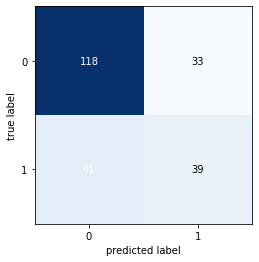

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
clf_KNN = KNeighborsClassifier(n_neighbors=5)
clf_KNN.fit(x_train,y_train)
y_pred = clf_KNN.predict(x_test)
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
print(classification_report(y_test,y_pred))
from mlxtend.plotting import plot_confusion_matrix
matrix = confusion_matrix(y_test,y_pred)
fig,ax = plot_confusion_matrix(conf_mat=matrix)
plt.show()

# Decision Tree

              precision    recall  f1-score   support

           0       0.81      0.70      0.75       151
           1       0.55      0.69      0.61        80

    accuracy                           0.70       231
   macro avg       0.68      0.69      0.68       231
weighted avg       0.72      0.70      0.70       231



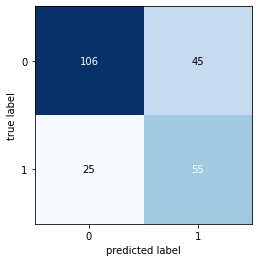

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
tree = DecisionTreeClassifier(random_state=1)
tree = tree.fit(x_train,y_train)
y_pred = tree.predict(x_test)
print(classification_report(y_test,y_pred))
matrix = confusion_matrix(y_test,y_pred)
fig,ax = plot_confusion_matrix(conf_mat=matrix)
plt.show()

#MLP

              precision    recall  f1-score   support

           0       0.79      0.82      0.81       151
           1       0.64      0.60      0.62        80

    accuracy                           0.74       231
   macro avg       0.72      0.71      0.71       231
weighted avg       0.74      0.74      0.74       231



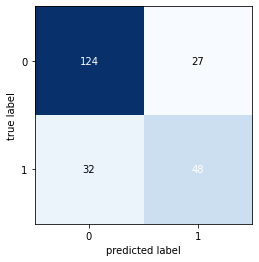

In [ ]:
from sklearn.neural_network import MLPClassifier
clf_mp = MLPClassifier(solver='lbfgs',alpha=1e-5,max_iter=280,hidden_layer_sizes=(5,10),random_state=1)
clf_mp = clf_mp.fit(x_train,y_train)
y_pred = clf_mp.predict(x_test)
print(classification_report(y_test,y_pred))
matrix = confusion_matrix(y_test,y_pred)
fig,ax = plot_confusion_matrix(conf_mat=matrix)
plt.show()

In [ ]:
import joblib
nome_arquivo = 'MLP.sav'
joblib.dump(clf_mp,nome_arquivo)



['MLP.sav']

In [ ]:
!pip install flask-ngrok

In [ ]:
import numpy as np
from flask_ngrok import run_with_ngrok
import joblib
from flask import Flask,request,jsonify,render_template
app = Flask(__name__,template_folder='/content/Flask_diabetes/templates')
run_with_ngrok(app)   #starts ngrok when the app is run

In [ ]:
def previsao_diabetes(lista_valores_formulario):
    prever = np.array(lista_valores_formulario).reshape(1,8)
    modelo_salvo = joblib.load('/content/Flask_diabetes/MLP.sav')
    resultado = modelo_salvo.predict(prever)
    return resultado[0]

In [ ]:
@app.route('/')
def home():
    return render_template('index.html')

In [ ]:
@app.route('/result',methods=['POST'])
def result():
    if request.method=='POST':
        lista_formulario = request.form.to_dict()
        lista_formulario=list(lista_formulario.values())
        lista_formulario=list(map(lambda x : int(x) ,lista_formulario))
        resultado = previsao_diabetes(lista_formulario)
        previsa = resultado
        if int(resultado)==1:
            previsa='Possui diabetes'
        else:
            previsa = 'Nao possui diabetes'
        return render_template('resultado.html',previsao=previsa)

In [ ]:
app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


 * Running on http://75e075c42f7e.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040


127.0.0.1 - - [18/Nov/2020 01:47:13] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [18/Nov/2020 01:47:13] "GET /favicon.ico HTTP/1.1" 404 -
127.0.0.1 - - [18/Nov/2020 01:47:27] "POST /result HTTP/1.1" 200 -
